# Scikit-learn: a tutorial
This is a brief tutorial on scikit-learn, which I crafted from online material, in particular from the scikit-learn webpage.

Scikit-learn is a python library with a lot of machine learning algorithms implemented, both for supervised and unsupervised learning. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Datasets
Scikit-learn has few built-in datasets for use. These are in the module `dataset`.

In [2]:
from sklearn import datasets 
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

Each datasets contains input data, targets, and input and target names. It may contain also additional information, e.g. raw images in case of image datasets. Pandas dataframes can be used as well. 

These are the attibutes of digits  ['DESCR', 'data', 'images', 'target', 'target_names']


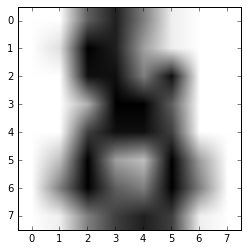

In [3]:
digits = datasets.load_digits()
print("These are the attibutes of digits ", dir(digits))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 

In [4]:
print(type(digits.images[-1]))
#these are 8x8 pixels images . 
print(digits.images.shape)
print(digits.images[-1])


<class 'numpy.ndarray'>
(1797, 8, 8)
[[ 0.  0. 10. 14.  8.  1.  0.  0.]
 [ 0.  2. 16. 14.  6.  1.  0.  0.]
 [ 0.  0. 15. 15.  8. 15.  0.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.]
 [ 0.  0. 12. 15. 15. 12.  0.  0.]
 [ 0.  4. 16.  6.  4. 16.  6.  0.]
 [ 0.  8. 16. 10.  8. 16.  8.  0.]
 [ 0.  1.  8. 12. 14. 12.  1.  0.]]


Datasets in scikit-learn consist of the input vector and of the target vector, passed separately to functions (and stored in separate variables). Input data is a numpy array with two dimensions. Rows contain single data points, columns cointain features. 

In [5]:
# we can in principle reshape the image to trasnform in into a dataset
#this transforms a single input point in a row
print(digits.images[-1].reshape((1, -1))) 
# this transforms the whole input images into a row
digits.images.reshape((digits.images.shape[0], -1))

[[ 0.  0. 10. 14.  8.  1.  0.  0.  0.  2. 16. 14.  6.  1.  0.  0.  0.  0.
  15. 15.  8. 15.  0.  0.  0.  0.  5. 16. 16. 10.  0.  0.  0.  0. 12. 15.
  15. 12.  0.  0.  0.  4. 16.  6.  4. 16.  6.  0.  0.  8. 16. 10.  8. 16.
   8.  0.  0.  1.  8. 12. 14. 12.  1.  0.]]


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
#though the dataset is already prepared!
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


#### Basic Operations on  Datasets
A cool thing of scikit-learn is that is has functions to perform routine operations on datasets, including: 
* generating Test and Train datasets. The relevant function is `train_test_split` from the module `model_selection`.
* Standardising input data. The function scale of the module `preprocessing` provides a quick and easy way to perform this operation on a single array-like dataset.


In [7]:
from sklearn.model_selection import train_test_split

#default test_size is 0.25
#random state is the seed of the random sampler used to generate test and train datasets
#data and target must have the same number of rows, i.e. same first coordinate of shape
print(iris.data.shape,iris.target.shape)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = \
    train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)



(150, 4) (150,)


In [8]:
from sklearn import preprocessing

# si sottrae la media e si divide per la deviazione standard
iris_X_scaled = preprocessing.scale(iris_X_train)
print("Non standardised\n",iris_X_train[:5,:])
print("Standardised\n",iris_X_scaled[:5,:])

# non posso standardizzare i dati di test su una media diversa

Non standardised
 [[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]]
Standardised
 [[ 0.18206758  0.71103882  0.45664061  0.5584109 ]
 [-1.17402201  0.00522823 -1.10334891 -1.19183221]
 [-0.04394735 -0.93585257  0.77939706  0.93346299]
 [-0.26996228 -0.93585257  0.29526238  0.1833588 ]
 [-0.26996228 -0.46531217 -0.02749407  0.1833588 ]]


#### Transformer API and Preprocessing
Scikit-learn has some API/ interfaces which are very useful to automate the learning process.
As data preprocessing has an important role in learning - typically dataset are standardised or normalised in some way - there several classes implementing the Transformer API. 

The two relevant methods of a transformer object are `fit()` and `transform()`. The first one is used to train the transformer, e.g. define the standardisation for each feature, the second one to apply the transformation to novel data. Transformer objects can be trained on the train datasets and then applied to test datasets, hence they should be the methods of choice.  

Data preprocessing is usually performed through the `Scaler` objects, which are of several types:
* `StandardScaler` performs classic standardisation;
* `MinMaxScaler` normalises data into [0,1], where 0 is the minimum and 1 is the maximum of each feature, but different ranges can be specified as well;
* `MaxAbsScaler` divides each feature for the absolute value, hence data is scaled in [-1,1];
* `RobustScaler` deals better with data with outliers, as it removes the median and scales the data according to the quantile range;

Other methods perform non-linear transformations:
* `QuantileTransformer` performs a non-linear transformation using quantiles. Better for outliers, but being non-linear, it breaks the correlation. 
* `Normalizer` scales individual samples to have unit norm. 

In [9]:
scaler = preprocessing.StandardScaler()
scaler.fit(iris_X_train)
iris_X_scaled = scaler.transform(iris_X_train)
# uso lo stesso scaler del train set sul test set, invece di creare uno nuovo
iris_X_test_scaled = scaler.transform(iris_X_test)

print("Non standardised\n",iris_X_test[:5,:])
print("Standardised\n",iris_X_test_scaled[:5,:])

Non standardised
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
Standardised
 [[-0.04394735 -0.70058237  0.77939706  1.55854981]
 [ 0.18206758 -2.11220356  0.1876769  -0.19169329]
 [-0.38296975  2.59320041 -1.21093439 -1.19183221]
 [ 1.65116464 -0.46531217  1.42490997  0.80844563]
 [-0.94800707  0.71103882 -1.15714165 -1.19183221]]


In [10]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(iris_X_train)
iris_X_scaled = scaler.transform(iris_X_train)
iris_X_test_scaled = scaler.transform(iris_X_test)

print("Non standardised\n",iris_X_test[:5,:])
print("Standardised\n",iris_X_test_scaled[:5,:])

Non standardised
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
Standardised
 [[0.41666667 0.27272727 0.68965517 0.95833333]
 [0.47222222 0.         0.5        0.375     ]
 [0.33333333 0.90909091 0.05172414 0.04166667]
 [0.83333333 0.31818182 0.89655172 0.70833333]
 [0.19444444 0.54545455 0.06896552 0.04166667]]


In [18]:
#Each scaler has some options, use help or refer to scikit-learn manual!
# help(preprocessing.MinMaxScaler) 

### Supervised Learning
Regression and classification in scikit-learn follow a similar pattern. Different methods are based on instances of the `Estimator` class, which provides methods to fit the estimator - `fit()`, to predict on new data - `predict()`, and to score the model - `score()`.   

We will start with an example on linear regression, on a diabetis dataset. The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.

For linear regression, there is the module `linear_model`, which has several implementation of linear regression, the basic one and some regularised versions. 


In [12]:
# preparing the dataset
diabetes = datasets.load_diabetes()
# split
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test \
    = train_test_split(diabetes.data, diabetes.target, random_state=0)
scaler = preprocessing.StandardScaler().fit(diabetes_X_train)   
diabetes_X_train = scaler.transform(diabetes_X_train)
diabetes_X_test = scaler.transform(diabetes_X_test)

In [13]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(diabetes_X_train, diabetes_y_train)
print(regressor.coef_)
print("Explained variance score:", regressor.score(diabetes_X_test, diabetes_y_test))

[ -2.08201439  -9.93774758  28.8548248   14.33603969 -26.52011217
  12.38436283  -0.42239104   6.59599005  34.458465     1.41463977]
Explained variance score: 0.35940090989715523


The explained variance regression score measures the fraction of variance which is captured by the regression models. 
If $y^*$ is the estimated target output, and y the corresponding (correct) target output, and $Var$ is the Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\mbox{explained_variance}(y,y^*) = 1 - \frac{Var[y-y^*]}{Var[y]}$

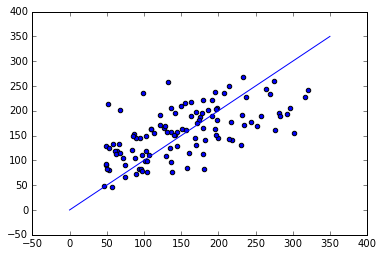

In [14]:
#We can use predict on a matrix, and get a vector of predictions. 
y_predict = regressor.predict(diabetes_X_test)
plt.figure()
plt.scatter(diabetes_y_test,y_predict)
plt.plot(np.linspace(0,350,100),np.linspace(0,350,100))


In the module `linear_model`, we have several linear classifiers, including some that are regularised, in particular `Ridge` and `Lasso` regression. These can be used similarly to the linear classifier above, 

Explained variance score: 0.35920949931140067


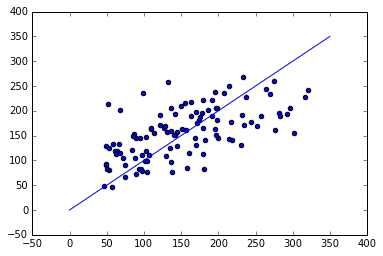

In [15]:
# entrambi i metodi prevengono l'overfitting
# Lasso tende a sparsificare
# Ridge riduce ma non annulla
regressor = linear_model.Ridge(alpha=0.1)
regressor.fit(diabetes_X_train, diabetes_y_train)

print("Explained variance score:", regressor.score(diabetes_X_test, diabetes_y_test))

y_predict = regressor.predict(diabetes_X_test)
plt.figure()
plt.scatter(diabetes_y_test,y_predict)
plt.plot(np.linspace(0,350,100),np.linspace(0,350,100))

Both Ridge and Lasso regression depend on a coefficient of regularization, which should be estimated in the learning process. Scikit-learn exposes methods that do ridge/lasso regression and cross-validation in a single step: `RidgeCV` and `LassoCV` (there are more CV methods for Lasso, see the documentation).

Best alpha: 0.1
Explained variance score: 0.3560771304937662
111 111


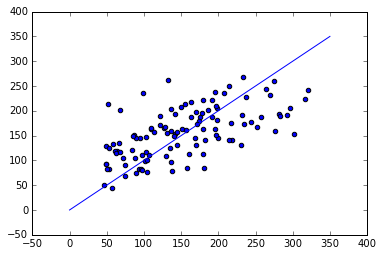

In [16]:
regressor = linear_model.LassoCV(alphas=np.logspace(-2,2,5))
regressor.fit(diabetes_X_train, diabetes_y_train)
print("Best alpha:",regressor.alpha_)
print("Explained variance score:", regressor.score(diabetes_X_test, diabetes_y_test))


y_predict = regressor.predict(diabetes_X_test)

print(len(diabetes_X_test), len(y_predict))
plt.figure()
plt.scatter(diabetes_y_test,y_predict)
plt.plot(np.linspace(0,350,100),np.linspace(0,350,100))

#### Exercise
Explore Scikit-learn to find how to construct linear models with general basis functions. Try a quadratic linear predictor on the diabetes dataset.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
# help(PolynomialFeatures)

In [22]:
new_X_train = poly.fit_transform(diabetes_X_train, diabetes_y_train)

print(len(new_X_train), len(diabetes_X_train))
print(len(diabetes_X_test), len(y_predict))

NameError: name 'poly' is not defined

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2)
# # new_X_train = poly.fit_transform(diabetes_X_train, y=diabetes_y_train)
# new_X_train = poly.fit_transform(diabetes_X_train)

# regressor = linear_model.LinearRegression()
# regressor.fit(new_X_train, diabetes_y_train)

# y_predict = regressor.predict(diabetes_X_test)

# # poly = PolynomialFeatures(degree=2)
# # X_ = poly.fit_transform(X)
# # predict_ = poly.fit_transform(predict)
# # clf = linear_model.LinearRegression()
# # clf.fit(X_, vector)
# # print clf.predict(predict_)


# # regressor = linear_model.LassoCV(alphas=np.logspace(-2,2,5))
# # regressor.fit(diabetes_X_train, diabetes_y_train)
# # print("Best alpha:",regressor.alpha_)
# # print("Explained variance score:", regressor.score(diabetes_X_test, diabetes_y_test))
# # y_predict = regressor.predict(diabetes_X_test)

# # plt.figure()
# # plt.scatter(diabetes_y_test, y_predict)
# # plt.plot(np.linspace(0,350,100),np.linspace(0,350,100))

### Cross validation
Setting regularisation parameters or controlling model complexity in a frequentist setting can be achieved using cross validation. Scikit learn implements a nice interface for cross validation and to optimize hyperparameters. 

To fully exploit cross validation, we need to use cross validation iterators, available in the module `sklearn.model_selection`. These are objects that generate the proper splits of the train dataset. Examples are:
* `KFold` is for k fold cross validation, use `n_splits` to set the number of splits.
* `RepeatedKFold`, like k-fold, but repeated `n_repeats` times. By setting `random_state` we can replicat experiments. 
* `LeaveOneOut` is for leave one out  (LOO) cross validation. In terms of accuracy, LOO often results in high variance as an estimator for the test error, and 5- or 10- fold cross validation should be preferred to LOO, though if the learning curve is steep for the training size in question, then 5- or 10- fold cross validation can overestimate the generalization error.
* `ShuffleSplit` generates a user defined number of independent train / test dataset splits, with the test size specified by the option `test_size`. Samples are first shuffled and then split into a pair of train and test sets.
It is possible to control the randomness for reproducibility of the results by explicitly seeding the `random_state` pseudo random number generator.
* `StratifiedKFold` it's like `KFold`, but using stratified sampling, i.e. it preserves the percentage of samples of each target class as the complete set.

The previous methods work with i.i.d. data, an assumption violated if the underlying generative process yield groups of dependent samples (i.e. medical data collected from multiple patients, with multiple samples taken from each patient). In this case, if we know the group for each data point, we can use `GroupKFold` or `LeaveOneGroupOut`. See the Scikit-learn [documentation](http://scikit-learn.org/stable/modules/cross_validation.html) for further details. 



In [ ]:
from sklearn import model_selection
kf_cv = model_selection.KFold(n_splits=3)
for train, test in kf_cv.split(['a','b','c','d', 'e','f']):
    print("%s %s" %  (train, test))
#see the KFold outputs indices of train and test sets. 

In order to perform cross validation on a specific estimator, we can use the `cross_val_score` function, which takes as input:
1. an estimator
2. train and test datasets
3. a cross_validation iterator, with the option `cv`
4. a scoring criterion, with the option `scoring`.

The method computes the scores for a fixed value of hyperparameters!

The function `cross_val_predict` has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. Only cross-validation strategies that assign all elements to a test set exactly once can be used (otherwise, an exception is raised).

In [ ]:
scoring = ['explained_variance', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
regressor = linear_model.Ridge(alpha=0.1)
kf_cv = model_selection.KFold(n_splits=5)


scores = model_selection.cross_val_score(regressor, diabetes.data, diabetes.target, scoring='r2',cv=kf_cv)
print("SV score:", scores.mean(),"±",scores.std(),"\n")

regressor = linear_model.Ridge(alpha=0.1)
prediction = model_selection.cross_val_predict(regressor, diabetes.data, diabetes.target, cv=kf_cv)
for i in range(5):
    print("predicted:",prediction[i],"- true",diabetes.target[i])

##### Optimizing hyperparameters with cross-validation
In order to optimize parameters, we can rely on built-in methods in the `model_selection` module, which perform either grid search or random search. The first explores all hyperparameters combinations ona  grid (can explote computationally), which the second performs random search, exploring only a fixed subset of random points. 

Which are the hyperparameters of an estimator? We can get them using `estimator.get_params()` method. 

A search consists of:
* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space, specified as a dictionary or list of dictionaries;
* a method for searching or sampling candidates;
* a cross-validation scheme; 
* a score function.

`GridSearchCV` performs the grid search, while `RandomizedSearchCV` does the randomised search, and requires also the specification of a computational budget using the `n_iter` options. The option `n_jobs=-1` uses maximum number of parallel threads/ processes to perform the CV search. 

In [ ]:
regressor = linear_model.Ridge()
parameters = {'alpha':np.logspace(-5,2,8)}
score = 'r2'
kf = model_selection.KFold(n_splits=5)
clf = model_selection.GridSearchCV(regressor, parameters,cv=kf,scoring=score,n_jobs=-1)
clf.fit(diabetes.data, diabetes.target)
print(clf.best_params_)


In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.9f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
from scipy import stats
regressor = linear_model.Ridge()
#note, for randomised search we pass a continuous distribution for continuos parameters.
parameters = {'alpha': stats.expon(scale=0.001)}
score = 'r2'
kf = model_selection.KFold(n_splits=5)
clf = model_selection.RandomizedSearchCV(regressor, parameters,cv=kf,scoring=score,n_jobs=-1,n_iter = 10)
# usare verbose per fare un log del fitting!

clf.fit(diabetes.data, diabetes.target)
print(clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.9f (+/-%0.03f) for %r" % (mean, std * 2, params))


### Classification
Classification is a task similar to regression in Scikit-learn, we just need to instantiate the proper objects. 
`LogisticRegression` is probably the most famous classifier, and in Scikit-learn comes with a built-in regularization L2 regularization. `C` here control the regularization strenght, but the larger it is the less regularization! L1 penalty can be set by `penalty='l1'` option.

In [ ]:
# C is the inverse of alpha
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)
print("Classification accuracy:",logistic.score(iris_X_test,iris_y_test))

There are many classification algorithms in Scikit-learn, like nearest neighbours, decision trees, support vector machines, and many others. 

In [ ]:
from sklearn import neighbors

neigh_class = neighbors.KNeighborsClassifier(n_neighbors=5, weights="distance")
neigh_class.fit(iris_X_train, iris_y_train)
print("Classification accuracy:",neigh_class.score(iris_X_test,iris_y_test))

In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C = 1)
svc.fit(iris_X_train, iris_y_train)    
print("Classification accuracy (linear):", svc.score(iris_X_test,iris_y_test))

svc = svm.SVC(kernel='poly', degree=3)
svc.fit(iris_X_train, iris_y_train)    
print("Classification accuracy (poly):", svc.score(iris_X_test,iris_y_test))


svc = svm.SVC(kernel='rbf',C=1.0)
svc.fit(iris_X_train, iris_y_train)    
print("Classification accuracy (rbf):", svc.score(iris_X_test,iris_y_test))

When specifying a parameter space for grid (or random) search, we can also pass a list of dictionaries, like in the following set of parameters for SVC. 
```
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
```

#### Exercise
Run cross validation with SVM on rbf and poly kernel, trying to improve over basic results, playing with the regulariser `C`. 

In [ ]:
values = np.arange(1.0,5.,0.5)
# values = [1, 10, 100, 1000]

print("Classification accuracy (rbf):")
rbf_results= list()
for x in values:
    svc = svm.SVC(kernel='rbf',C=x)
    svc.fit(iris_X_train, iris_y_train)
    accuracy = svc.score(iris_X_test,iris_y_test)
    print("C=", x,", accuracy=", accuracy)
    rbf_results.append(accuracy)
    
plt.plot(results)
plt.show()

print("Classification accuracy (linear):")
rbf_results= list()
for x in values:
    svc = svm.SVC(kernel='linear',C=x)
    svc.fit(iris_X_train, iris_y_train)
    accuracy = svc.score(iris_X_test,iris_y_test)
    print("C=", x,", accuracy=", accuracy)
    rbf_results.append(accuracy)
plt.plot(results)
plt.show()

degrees = range(2,6)
print("\nClassification accuracy (poly):")
poly_results= list()
for x in degrees:
    svc = svm.SVC(kernel='poly',degree=x)
    svc.fit(iris_X_train, iris_y_train)
    accuracy = svc.score(iris_X_test,iris_y_test)
    print("degree=", x,", accuracy=", accuracy)
    poly_results.append(accuracy)
plt.plot(poly_results)
plt.show()

### Model Scoring
Scikit-learn implements many different ways of scoring models, both for regression, classification, clustering, etc. 
You can find a detailed list and discussion in the [online reference](http://scikit-learn.org/stable/modules/model_evaluation.html).

* **Estimator score** method: each estimators has a default score method, see each estimator’s documentation.
* **Scoring parameter**: cross-validation rely on an internal scoring strategy. One can pass a predefined Scorer object, or a custom scorer, maybe obtained from a metrics. 
* **Metric functions**: the `metrics` module implements functions assessing prediction error for specific purposes. 

In the list of predefined scores, and also in metrics, particularly for multi-class classification, there are some attributes that govern how binary classification is used to score the multi-class case (e.g. `f1`,`f1_micro`,`f1_macro`,`f1_weighted`,`f1_samples`).
* `macro` simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.
* `weighted` accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.
* `micro` gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.
* `samples` applies only to multilabel problems. It does not calculate a per-class measure, instead calculating the metric over the true and predicted classes for each sample in the evaluation data, and returning their (sample_weight-weighted) average.



In [ ]:
from sklearn import metrics

clf = svm.SVC(kernel='linear', C=1)
scores = model_selection.cross_val_score(clf, iris.data, iris.target, cv=10)
print("score:","accuracy",":",scores.mean(),"±",scores.std())

scorers = ['precision_macro','recall_macro','f1_macro']
for sc in scorers:
    scores = model_selection.cross_val_score(clf, iris.data, iris.target, cv=10, scoring=sc)
    print("score:",sc,":",scores.mean(),"±",scores.std())

##### Make your own scorer
An alternativa to predifined scorer objects is to generate a custom one, likely starting from a function in the  module `sklearn.metrics`. We can convert them using the `make_scorer` method. Note that the following convention on functions of  `sklearn.metrics` apply:
* functions ending with `_score` return a value to maximize, the higher the better.
* functions ending with `_error` or `_loss` return a value to minimize, the lower the better. When converting into a scorer object, set the `greater_is_better` parameter to `False`.


As an example we will craft a F-beta scorer, with beta equal to 2. The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of precision in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors recall (beta -> 0 considers only precision, beta -> inf only recall). This roeks for a two class problem. 




In [ ]:
ftwo_scorer = metrics.make_scorer(metrics.fbeta_score, beta=2)
grid = model_selection.GridSearchCV(svm.SVC(kernel='linear'), cv=5, param_grid={'C': np.logspace(-1,3,5)}, scoring=ftwo_scorer)
#make a random dataset for testing
X, y = datasets.make_classification(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
clf = grid.fit(X_train,y_train)
clf.fit(X_train,y_train)
print("Linear SVM, score:",clf.score(X_test,y_test))
print("Linear SVM, best params:",clf.best_params_)


In [ ]:
# this is a nice summary for classification
target_names = ['class 0', 'class 1']
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=target_names))

### Dimensionality Reduction
When working with high-dimensional data, it can be a clever idea to try to reduce dimensionality. The most common approach is PCA, which finds the best linear projection of data Ii.e. the one explaining most of the variance).  

PCA in Scikit-learn is in the module `decomposition`, and it can be used to transform/ preprocess data (also in pipelines, see below). 

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 8,whiten=True)
pca.fit(diabetes_X_train)

# la somma degli autovalori è la varianze
print("Explained variance of PCA:",pca.explained_variance_)
print("Noise variance:",pca.noise_variance_) # media delle varianze


regressor = linear_model.Ridge(alpha=0.1)
regressor.fit(pca.transform(diabetes_X_train),diabetes_y_train)

# score della regressione
print("Explained variance:",regressor.score(pca.transform(diabetes_X_test),diabetes_y_test)) 

### Pipelining
Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

Pipeline serves two purposes here:
* **Convenience and encapsulation:** fit and predict need to be called only once on the data.
* **Joint parameter selection:** to grid search over parameters of all estimators in the pipeline at once.
* **Safety:** to avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.


In [ ]:
from sklearn import pipeline
estimators = [('scaler', preprocessing.StandardScaler()), ('clf', svm.SVC(kernel='rbf',gamma=1.0,C=1.0))]
pipe = pipeline.Pipeline(estimators)
pipe.fit(iris_X_train,iris_y_train)

y_predict = pipe.predict(iris_X_test)
print("Explained variance:",pipe.score(iris_X_test,iris_y_test))

print(metrics.classification_report(iris_y_test, y_predict, target_names=iris.target_names))

In [ ]:
#this is the way to refer to parameters of each estimator
pipe.set_params(clf__C=10)

In [ ]:
#this accesses the estimator
pipe.named_steps['clf']
# use pipe.steps[0] for step 0 etc.

In [ ]:
#why this behaves so strangely?

import warnings
warnings.filterwarnings('ignore')

param_grid = dict(clf__C=np.linspace(0.1,2,11), clf__gamma=[0.5,1,1.5,2,2.5])
grid = model_selection.GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring = "f1_macro")
clf = grid.fit(iris_X_train,iris_y_train)
print(grid.best_params_)
clf.fit(iris_X_train,iris_y_train)
y_predict = clf.predict(iris_X_test)
print(metrics.classification_report(iris_y_test, y_predict , target_names=iris.target_names))

### Gaussian processes for prediction

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('co2/co2_weekly_mlo.txt', skiprows=49, sep="\s+", header=None, names = ["yr", "mon", "day", "decimal", "ppm", "days" , "1_yr_ago",  "10_yr_ago" , "since_1800"])
data.head()


In [ ]:
data['ppm'].replace(-999.9900, np.nan, inplace=True)
data.iloc[72]

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared

In [ ]:
size = int(len(data)*0.6)
train = data[0:size]
test = data[size:len(data)]

kernel = RBF(length_scale=67.0)

gp = GaussianProcessRegressor(kernel, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(train['decimal'], train['ppm'])